# **HDT1 - Modelación y simulación**

### integrantes: 
- Francis Aguilar - 22243
- Diego García - 22404
- Angela García -22869

# Ejercicio 1


1. **Defina los stocks (reservas) y los flujos en la dinámica de sistemas. Proporcione un ejemplo real (p. ej., modelado de pandemias).**<br>
Un stock es algo que se va acumulando con le tiempo y puede medirse en un instante. Por su parte, un flujo es el cambio en el tiempo de un stock. Se miden por tasas (de tiempo) y pueden ser entradas o salidas. El ejemplo pyede ser un modelo de inventario para una tienda. El stock sería la cantidad de productos que hay disponibles en un momento dado. Por su parte, el flujo puede darse en dos situaciones, cuando alguien compra un producto, lo que sería un flujo de salida, y cuando se repone el inventario, lo que sería flujo de entrada.

2. **Explique la diferencia entre ciclos de retroalimentación de equilibrio (negativos) y de refuerzo (positivos). Dé un ejemplo de cada uno en el contexto de la COVID-19.**<br>
Un ciclo de retroalimentación es cuando existe una cadena de cambios en un sistema. Es decir que si algo cambia en una parte, esta causará un cambio en otro y esta en otra y así sucesivamente. Cuando es de equilibrio (negativo) lo que se busca es estabilizar el sistema, contradiciendo un cambio realizado. Por otro lado, cuando es de refuerzo (positivo) se busca amplificar el cambio inicial, haciendo que sus consecuencias sean mayores en el sistema. Por ejemplo, el uso de mascarillas durante la pandemia era un ciclo de retroalimentación de equilibrio, pues al aumentar los casos de enfermedades (cambio inicial), las personas se preocupaban y empezaban a ser más precavidos. El uso de las mascarillas hacía que la transmición fuera menos probable, reduciendo el número de contagios (reduce el impacto del cambio). Otro ejemplo es que la forma en la que se propagó la enfermedad durante la pandemia fue un ciclo de retroalimentación de refuerzo, ya que si una persona se infectaba (cambio inicial) esta podia contagiar a muchas otras y cada una de estas a muchas otras más y así, hasta crear grandes números de contagios rápidamente (aumento del cambio inicial).

3. **¿Por qué las ecuaciones diferenciales son fundamentales en los modelos de dinámica de sistemas? ¿Cómo capturan la no linealidad?**<br>

4. **Dibuje un diagrama de bucle causal para la ocupación de camas hospitalarias durante una pandemia. Etiquete las reservas (p. ej., "Pacientes de UCI"), los flujos (p. ej., "Admisiones") y los bucles de retroalimentación (p. ej., "Hacinamiento → Estancias más prolongadas → Disponibilidad reducida de camas").**<br>

# Ejercicio 2


1. **¿Qué es un agente en el modelo ABM? ¿En qué se diferencia de un "stock" en la dinámica de sistemas?**

    Un agente en el modelo ABM es una entidad física o virtual que toman decisiones de manera autónoma, estos pueden ser representados como átomos, células, animales, gente e organizaciones. Estos dependen de la aplicación que se les de, además tienen recursos propios, objetivos, capacidades sensoriales.  
    Lo que se diferencia de un stock en la dinámica de sistemas es que un stock es una variable acumulatica, que se va llenando o vaciando, en cambio de un agente ABM que tiene comportamientos y decisiones, no es que acumule cosas por si mismos.
    Por otra parte los stocks, no interactuan y no deciden nada, estos representan cantidades que cambian con el tiempo. A diferencia de un agente que tiene objetivos, estrategia y memoria. 


2. **Describa cómo se representa la heterogeneidad (p. ej., edad, ingresos) en el ABM en comparación con la dinámica de sistemas.** 
    La heterogeneidad, en los ABM es explicitá y granular, porque cada agente puede tener atributos únicos. Cada agente tiene propiedades individuales y estas pueden llegar a influir en su comportamiento, decisiones y evolución. Además, se pueden usar distribuciones estadísticas para asignar valores iniciales. Y por último, pueden cambiar con el tiempo, ya que ganan experiencia o cambian de estrategia. 
    Y en la dinámica de sistemas la heterogeneidad se representa de forma agregada o segmentada, no es individualmente. Se crean stocks separados para cada grupo y cada stock tienen flujos que representan transiciones entre grupos. La diferencia de grupos se modelan con parámetros distintos.


3. **¿Por qué el ABM suele ser estocástico? ¿Cómo afecta esto a la interpretación del modelo?**
    El ABM suele ser estocástico ya que es complejo y muestra la incertidumbre y la variavilidad. Este tiene variabilidad individual, ambientes inciertos, interacciones impredecibles y exploración de escenarios. Al tener todas estas caracteristicas, dan resultados no deterministas, ya que una misma configuración inicial puede producir resultados diferentes en cada ejecución. Otra forma en la que afecta, es en el análisis estadístico, en lugar de una única predicción se analizan tendencias, medias, desviaciones estandar y otras estadisticas.  

4. **Imagine modelar una campaña de vacunación. Compare cómo la dinámica de sistemas (compartimentos agregados) y el análisis de mercado (agentes individuales) representarían la reticencia a la vacunación. ¿Qué enfoque captura mejor las redes sociales?**

    El enfoque que capruta mejor las redes sociales puede ser el de ABM dya que este al tener un nivel de análisis individual la reticencia se representa con un agente que es unas persona con atributos únicos, como la edad, sexo, educación y otros. Este también puede depender de experiencias previas, creencias personales o la influencia de otros agentes y las decisiones de vacunacion pueden ser moldeadas como probabilidades. Además, las redes sociales son una red de interacción ya que se comparte información.



# Ejercicio 3

In [18]:
#1. dinamica del sistema, nivel agregado - modelo SIR

#b. ecuaciones diferenciales para modelar las transiciones agregadas entre comportamientos
#c. considerar los parámetros, como tasa de transmisión, tasa de recuperación y afectan a la curva epidemica

class SIR:
    def __init__(self, poblacion, infectados_iniciales, recuperados_iniciales, beta, gamma):
        self.N = poblacion
        self.beta = beta
        self.gamma = gamma

        self.S = poblacion - infectados_iniciales - recuperados_iniciales
        self.I = infectados_iniciales
        self.R = recuperados_iniciales

        #historial
        self.historial = {
            'S' : [self.S],
            'I': [self.I],
            'R': [self.R]
        }


    def paso(self, dt=1):
        nuevos_infectados = self.beta * self.S * self.I / self.N
        nuevos_recuperados= self.gamma*self.I

        #actualizacion
        dS = -(nuevos_infectados * dt)
        dI= (nuevos_infectados-nuevos_recuperados) * dt
        dR= nuevos_recuperados * dt

        self.S += dS
        self.I += dI
        self.R += dR

        #guardarlos
        self.historial['S'].append(self.S)
        self.historial['I'].append(self.I)
        self.historial['R'].append(self.R)

    def simular(self, dias, dt=1):
        pasos= int(dias/dt)
        for x in range(pasos):
            self.paso(dt)

    def get_historial(self):
        return self.historial




In [19]:
#modelo SIR puro
sir_puro = SIR(poblacion=1000, infectados_iniciales=10, recuperados_iniciales=0, beta=0.3, gamma=0.1)
sir_puro.simular(dias=160)

In [20]:
## MODELO BASE DE AGENTE

import random

class Agente:
    def __init__(self, estado='S'):
        self.estado = estado
        self.dias_infectado = 0

        
class ModeloABM:
    def __init__(self, poblacion, infectados_iniciales, beta, dias_recuperacion):
        self.poblacion = []
        for i in range(poblacion):
            agente = Agente()     # crea un nuevo agente
            self.poblacion.append(agente)  # lo agrega a la lista

        self.beta = beta  # probabilidad de contagio por contacto
        self.dias_recuperacion = dias_recuperacion

        # infectar a algunos agentes al inicio
        infectados = random.sample(self.poblacion, infectados_iniciales)
        for agente in infectados:
            agente.estado = 'I'

        self.historial = {
            'S': [],
            'I': [],
            'R': []
        }

    def contar_estados(self):
        s = sum(1 for a in self.poblacion if a.estado == 'S')
        i = sum(1 for a in self.poblacion if a.estado == 'I')
        r = sum(1 for a in self.poblacion if a.estado == 'R')
        self.historial['S'].append(s)
        self.historial['I'].append(i)
        self.historial['R'].append(r)

    def paso(self):
        # Simular interacciones entre pares de agentes
        for agente in self.poblacion:
            if agente.estado == 'S':
                otros = random.sample(self.poblacion, 5)  # 5 interacciones por día
                for otro in otros:
                    if otro.estado == 'I':
                        if random.random() < self.beta:
                            agente.estado = 'I'
                            break

        # Actualizar días infectado y recuperación
        for agente in self.poblacion:
            if agente.estado == 'I':
                agente.dias_infectado += 1
                if agente.dias_infectado >= self.dias_recuperacion:
                    agente.estado = 'R'

        self.contar_estados()

    def simular(self, dias):
        for _ in range(dias):
            self.paso()

    def get_historial(self):
        return self.historial


In [21]:
# Modelo ABM puro
abm_puro = ModeloABM(poblacion=200, infectados_iniciales=2, beta=0.1, dias_recuperacion=10)
abm_puro.contar_estados()
abm_puro.simular(160)

In [22]:
# Hibrido SIR y ABM

# Inicializar un modelo ABM a partir de un modelo SIR
def inicializar_ABM_desde_SIR(sir_modelo, total_agentes, beta, dias_recuperacion):
    historial = sir_modelo.get_historial()
    S0 = historial['S'][-1]
    I0 = historial['I'][-1]
    R0 = historial['R'][-1]

    total = S0 + I0 + R0
    prop_S = S0 / total
    prop_I = I0 / total
    prop_R = R0 / total

    # Asegurarse de que las proporciones sumen 1
    n_S = int(prop_S * total_agentes)
    n_I = int(prop_I * total_agentes)
    n_R = total_agentes - n_S - n_I

    abm = ModeloABM(
        poblacion=total_agentes,
        infectados_iniciales=0,
        beta=beta,
        dias_recuperacion=dias_recuperacion
    )

    # Asignar estados según proporciones
    for i in range(n_S):
        abm.poblacion[i].estado = 'S'
    for i in range(n_S, n_S + n_I):
        abm.poblacion[i].estado = 'I'
    for i in range(n_S + n_I, total_agentes):
        abm.poblacion[i].estado = 'R'

    return abm

# Calcula beta según el historial del ABM
def estimar_beta_desde_ABM(abm_historial, poblacion):
    
    # Evitar errores si no hay suficientes datos
    if len(abm_historial['S']) < 2:
        return 0.0
    
    s_prev = abm_historial['S'][-2]
    s_actual = abm_historial['S'][-1]
    i_prev = abm_historial['I'][-2]

    # Evitar división por cero
    if i_prev == 0 or s_prev == 0:
        return 0.0

    nuevos_infectados = s_prev - s_actual
    beta_estimado = nuevos_infectados * poblacion / (s_prev * i_prev)
    return beta_estimado



In [23]:
sir = SIR(poblacion=1000, infectados_iniciales=10, recuperados_iniciales=0, beta=0.3, gamma=0.1)

dias = 160
dt = 1
total_agentes = 200
dias_recuperacion = 10

for dia in range(dias):
    # Paso 1: SIR avanza un día
    sir.paso(dt)

    # Paso 2: Inicializa ABM con estados actuales del SIR
    abm = inicializar_ABM_desde_SIR(sir, total_agentes, beta=sir.beta, dias_recuperacion=dias_recuperacion)
    
    # Paso 3: Simula 1 día en el ABM
    abm.paso()

    # Paso 4: Estimar nuevo beta desde ABM
    nuevo_beta = estimar_beta_desde_ABM(abm.get_historial(), poblacion=total_agentes)

    # Paso 5: Actualizar beta en SIR con un promedio ponderado (opcional para suavizar variaciones bruscas)
    sir.beta = 0.9 * sir.beta + 0.1 * nuevo_beta
    

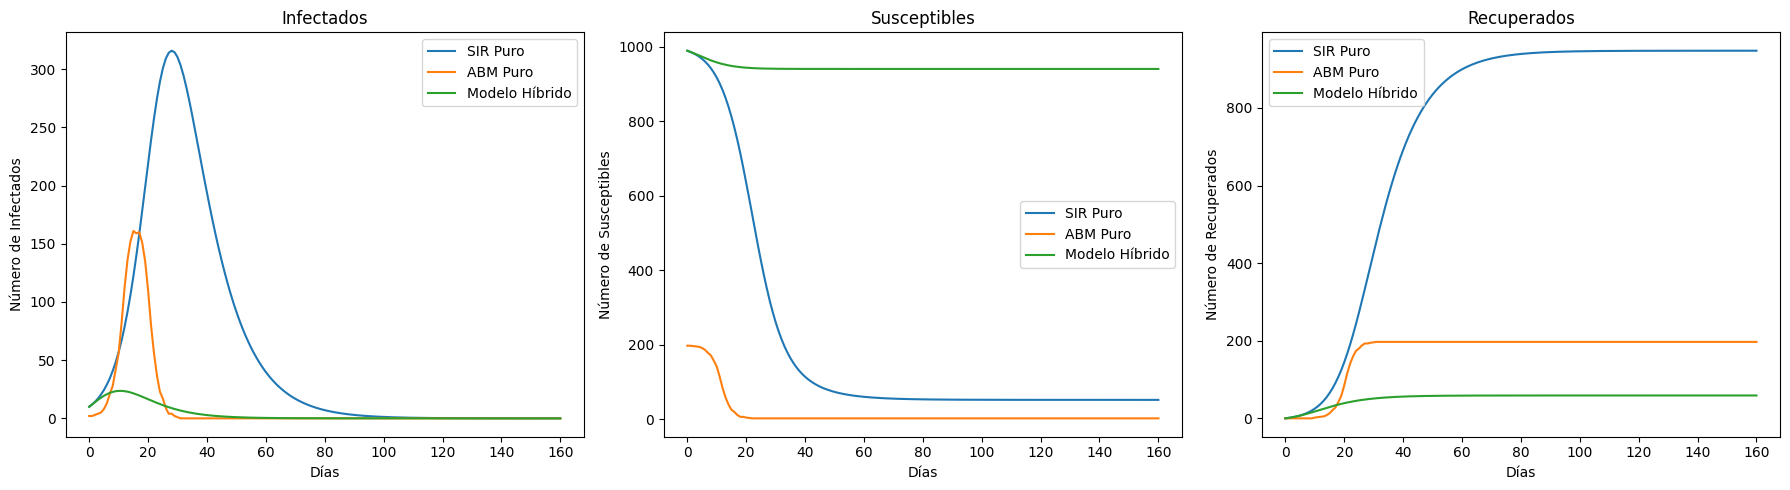

In [24]:
# Comparar resultados

import matplotlib.pyplot as plt

# Historiales
sir_h = sir_puro.get_historial()
abm_h = abm_puro.get_historial()
hibrido_h = sir.get_historial()

dias = range(161)  # 160 días + estado inicial

plt.figure(figsize=(18, 5))

# Infectados
plt.subplot(1, 3, 1)
plt.plot(dias, sir_h['I'], label='SIR Puro')
plt.plot(dias, abm_h['I'], label='ABM Puro')
plt.plot(dias, hibrido_h['I'], label='Modelo Híbrido')
plt.title('Infectados')
plt.xlabel('Días')
plt.ylabel('Número de Infectados')
plt.legend()

# Susceptibles
plt.subplot(1, 3, 2)
plt.plot(dias, sir_h['S'], label='SIR Puro')
plt.plot(dias, abm_h['S'], label='ABM Puro')
plt.plot(dias, hibrido_h['S'], label='Modelo Híbrido')
plt.title('Susceptibles')
plt.xlabel('Días')
plt.ylabel('Número de Susceptibles')
plt.legend()

# Recuperados
plt.subplot(1, 3, 3)
plt.plot(dias, sir_h['R'], label='SIR Puro')
plt.plot(dias, abm_h['R'], label='ABM Puro')
plt.plot(dias, hibrido_h['R'], label='Modelo Híbrido')
plt.title('Recuperados')
plt.xlabel('Días')
plt.ylabel('Número de Recuperados')
plt.legend()

plt.tight_layout()
plt.show()


**Análisis de resultados**